## Analysis of HELB Tweets

In [1]:
%config InlineBackend.figure_format = 'retina' # high resolution plotting
import matplotlib.pyplot as plt
import pandas as pd
import advertools as adv
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 280)

In [2]:
helb_df = pd.read_csv('HELB_tweets_2019_02_21.csv')
helb_df.head()

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,tweet_id,tweet_id_str,tweet_in_reply_to_screen_name,tweet_in_reply_to_status_id,tweet_in_reply_to_status_id_str,tweet_in_reply_to_user_id,tweet_in_reply_to_user_id_str,tweet_is_quote_status,tweet_lang,tweet_metadata,tweet_place,tweet_possibly_sensitive,tweet_quoted_status,tweet_quoted_status_id,tweet_quoted_status_id_str,tweet_retweet_count,tweet_retweeted,tweet_source,tweet_truncated,tweet_user,user_contributors_enabled,user_created_at,user_default_profile,user_default_profile_image,user_description,user_entities,user_favourites_count,user_follow_request_sent,user_followers_count,user_following,user_friends_count,user_geo_enabled,user_has_extended_profile,user_id,user_id_str,user_is_translation_enabled,user_is_translator,user_lang,user_listed_count,user_location,user_name,user_notifications,user_profile_background_color,user_profile_background_image_url,user_profile_background_image_url_https,user_profile_background_tile,user_profile_banner_url,user_profile_image_url,user_profile_image_url_https,user_profile_link_color,user_profile_sidebar_border_color,user_profile_sidebar_fill_color,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Thu Feb 21 18:23:15 +0000 2019,"[0, 245]","{'hashtags': [{'text': 'HELB', 'indices': [59, 64]}, {'text': 'Newsgang', 'indices': [222, 231]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AMB_A_Mohammed', 'name': 'AMB. (Dr.) Amina C. Mohamed', 'id': 1379223859, 'id_str': '1379223859', 'indices': [3, 18]}, {'screen...",NaN,0,False,"CS @AMB_A_Mohammed was categorical about the defaulters of #HELB. She mentioned defaulters ""who hold jobs"". Not jobless people. A jobless person can not be a defaulter. It is common sense. Pay the loan if you have a job. #Newsgang @YvonneOkwara",NaN,1098649366838038528,1098649366838038528,NaN,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 'recent'}","{'id': '01e215db7136a37e', 'url': 'https://api.twitter.com/1.1/geo/id/01e215db7136a37e.json', 'place_type': 'city', 'name': 'Nairobi', 'full_name': 'Nairobi, Kenya', 'country_code': 'KE', 'country': 'Kenya', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordin...",NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",False,"{'id': 1094123564, 'id_str': '1094123564', 'name': 'Alibash Mohamed', 'screen_name': 'Alibash_Mohamed', 'location': 'Nairobi, Kenya', 'description': '#ManUnited #GGMU\n\nRetweets ≠ Endorsement.', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'fol...",False,Wed Jan 16 04:34:06 +0000 2013,True,False,#ManUnited #GGMU\r\n\r\nRetweets ≠ Endorsement.,{'description': {'urls': []}},1602.0,NaN,3446.0,NaN,816.0,True,True,1.094124e+09,1.094124e+09,False,False,en,11.0,"Nairobi, Kenya",Alibash Mohamed,NaN,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/1094123564/1474838853,http://pbs.twimg.com/profile_images/972860463225634818/ZCNfx-1d_normal.jpg,https://pbs.twimg.com/profile_images/972860463225634818/ZCNfx-1d_normal.jpg,1DA1F2,C0DEED,DDEEF6,333333,True,False,Alibash_Mohamed,8865.0,NaN,none,NaN,NaN,False
1,NaN,NaN,Thu Feb 21 18:22:15 +0000 2019,"[37, 263]","{'hashtags': [{'text': 'HELB', 'indices': [123, 128]}], 'symbols': [], 'user_mentions': [{'screen_name': 'ntvkenya', 'name': 'NTV Kenya', 'id': 25985333, 'id_str': '25985333', 'indices': [0, 9]}, {'screen_name': 'RealMuinde', 'name': 'jay Muinde Njoroge', 'id': 88811620252187...",NaN,0,False,@ntvkenya @RealMuinde @SakajaJohnson We as the young people of this country we are told to bootstrap ourselves out of thi

In [3]:
helb_df.dtypes

tweet_contributors                          object
tweet_coordinates                           object
tweet_created_at                            object
tweet_display_text_range                    object
tweet_entities                              object
tweet_extended_entities                     object
tweet_favorite_count                         int64
tweet_favorited                               bool
tweet_full_text                             object
tweet_geo                                  float64
tweet_id                                     int64
tweet_id_str                                object
tweet_in_reply_to_screen_name               object
tweet_in_reply_to_status_id                 object
tweet_in_reply_to_status_id_str            float64
tweet_in_reply_to_user_id                   object
tweet_in_reply_to_user_id_str               object
tweet_is_quote_status                       object
tweet_lang                                  object
tweet_metadata                 

In [4]:
helb_df.tweet_full_text.head()

0                                      CS @AMB_A_Mohammed was categorical about the defaulters of #HELB. She mentioned defaulters "who hold jobs". Not jobless people.  A jobless person can not be a defaulter. It is common sense. Pay the loan if you have a job. #Newsgang @YvonneOkwara
1           @ntvkenya @RealMuinde @SakajaJohnson We as the young people of this country we are told to bootstrap ourselves out of this #HELB situation when millions of young people don't even have boots.\r\nDegrees gathering dusts in the boxes under beds.\r\n@SenMutula \r\n@UKenyatta
2                                                      While #HELB plans on arresting loan defaulters, the ministry is scrapping of the same #courses the defaulters studied. You can't pick-pocket a naked man, Or can you?  @bensonnesh1 @herbertmpoke  Not mentioning unemployment rates.
3                                                                                #HELB most of the graduates  lack the jobs to pay that loan itse

In [6]:
helb_df.shape

(2024, 72)

## Hashtag Summary

In [8]:
hashtag_summary = adv.extract_hashtags(helb_df['tweet_full_text'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [9]:
hashtag_summary['overview']

{'num_posts': 2024,
 'num_hashtags': 5816,
 'hashtags_per_post': 2.8735177865612647,
 'unique_hashtags': 471}

In [10]:
hashtag_summary['hashtags'][:10]

[['#helb', '#newsgang'],
 ['#helb'],
 ['#helb', '#courses'],
 ['#helb'],
 ['#helb'],
 ['#helb'],
 ['#helb'],
 ['#thursdaythoughts', '#helb'],
 ['#bill', '#helb'],
 ['#helb']]

In [11]:
hashtag_summary['hashtags_flat'][:10]

['#helb',
 '#newsgang',
 '#helb',
 '#helb',
 '#courses',
 '#helb',
 '#helb',
 '#helb',
 '#helb',
 '#thursdaythoughts']

In [12]:
hashtag_summary['hashtag_counts'][:10]

[2, 1, 2, 1, 1, 1, 1, 2, 2, 1]

In [13]:
hashtag_summary['hashtag_freq'][:15]

[(0, 5),
 (1, 1229),
 (2, 246),
 (3, 93),
 (4, 65),
 (5, 59),
 (6, 33),
 (7, 25),
 (8, 14),
 (9, 18),
 (10, 17),
 (11, 213),
 (12, 3),
 (13, 1),
 (14, 1)]

### Visualizing Frequency to get a better view of how they are distributed

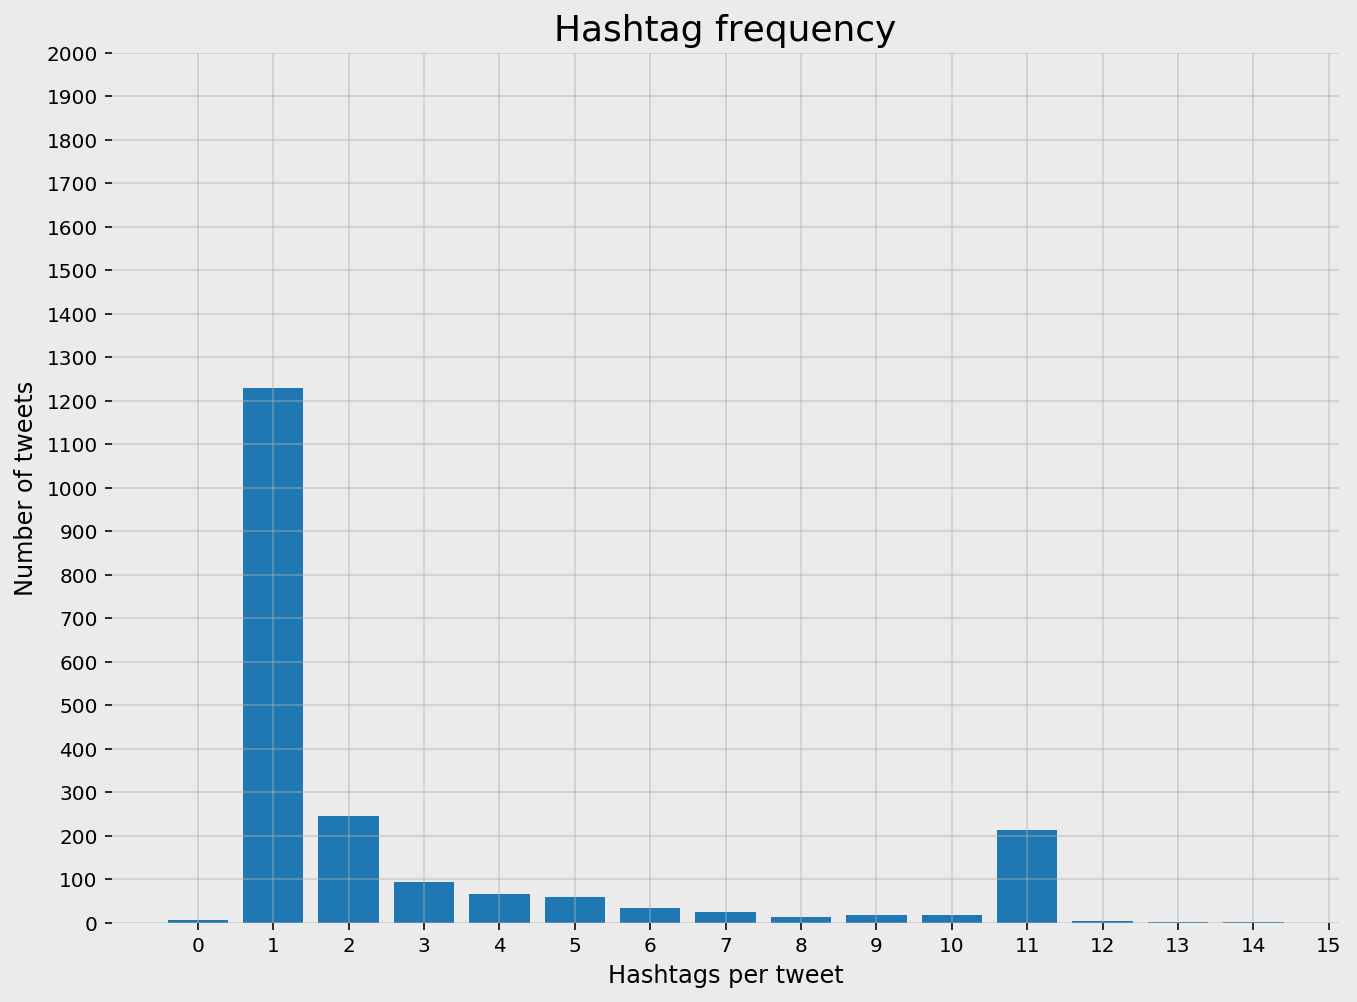

In [14]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

### Top Hashtags in the Tweets

In [15]:
hashtag_summary['top_hashtags'][:15]

[('#helb', 2066),
 ('#thursdaythoughts', 413),
 ('#bandahomesscam', 361),
 ('#sankalpafrica19', 273),
 ('#motherlanguageday', 215),
 ('#sona2019', 211),
 ('#sotnghana', 211),
 ('#sowetoderby', 210),
 ('#motherlanguagechallenge', 210),
 ('#joysms', 210),
 ('#citicbs', 210),
 ('#thursdaymotivation', 99),
 ('#kpcagainstcorruption', 68),
 ('#karibukijaniridge', 41),
 ('#appreciatingourheroes', 38)]

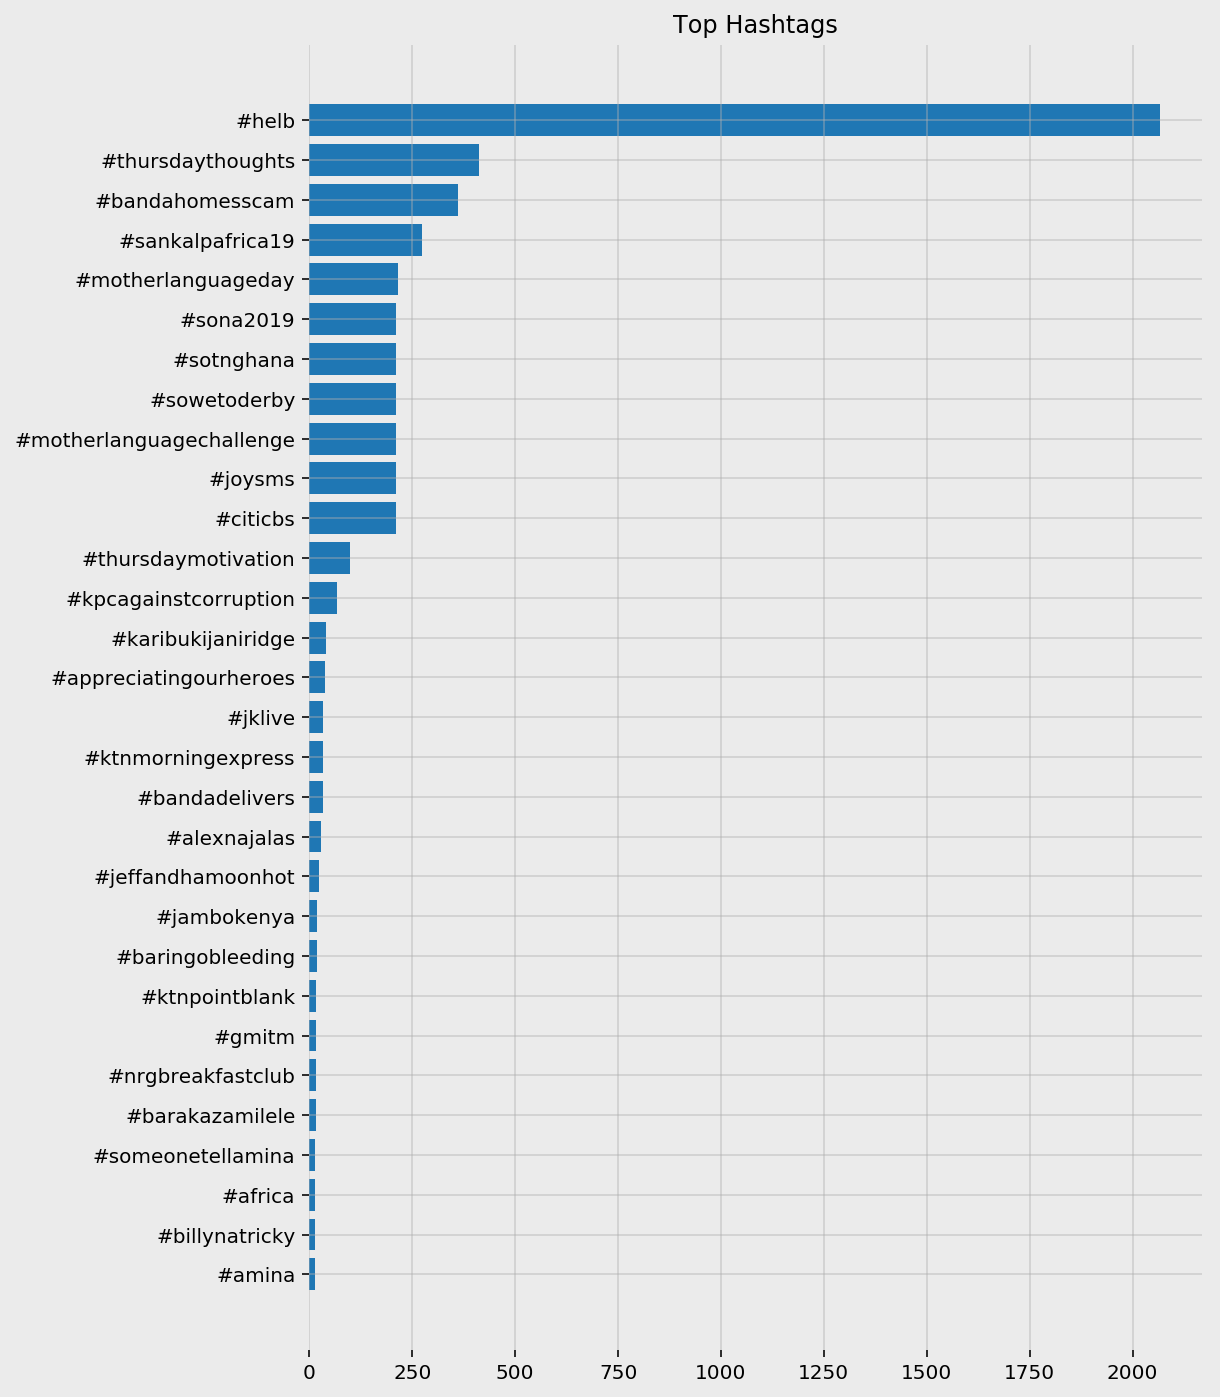

In [16]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

## Emoji Summary

In [17]:
emoji_summary = adv.extract_emoji(helb_df['tweet_full_text'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'overview'])

In [18]:
emoji_summary['overview']

{'num_posts': 2024,
 'num_emoji': 590,
 'emoji_per_post': 0.29150197628458496,
 'unique_emoji': 103}

In [19]:
emoji_summary['emoji'][:5]

[[], [], [], ['😠', '😠', '😠', '😠'], []]

In [20]:
emoji_summary['emoji_text'][:5]

[[], [], [], ['angry face', 'angry face', 'angry face', 'angry face'], []]

In [21]:
emoji_summary['emoji_flat'][:10]

['😠', '😠', '😠', '😠', '😣', '😃', '😃', '😃', '😃', '😹']

In [22]:
emoji_summary['emoji_flat_text'][:10]

['angry face',
 'angry face',
 'angry face',
 'angry face',
 'persevering face',
 'grinning face with big eyes',
 'grinning face with big eyes',
 'grinning face with big eyes',
 'grinning face with big eyes',
 'cat face with tears of joy']

### Combining Emoji Flat and Emoji Flat Text and Having a look at it Side by Side

In [23]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('😠', 'angry face'),
 ('😠', 'angry face'),
 ('😠', 'angry face'),
 ('😠', 'angry face'),
 ('😣', 'persevering face'),
 ('😃', 'grinning face with big eyes'),
 ('😃', 'grinning face with big eyes'),
 ('😃', 'grinning face with big eyes'),
 ('😃', 'grinning face with big eyes'),
 ('😹', 'cat face with tears of joy')]

In [24]:
emoji_summary['emoji_counts'][:15]

[0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [25]:
emoji_summary['emoji_freq'][:15]

[(0, 1791),
 (1, 87),
 (2, 60),
 (3, 36),
 (4, 26),
 (5, 3),
 (6, 11),
 (7, 6),
 (9, 1),
 (12, 2),
 (15, 1)]

### Emoji Frequency: Number of Emoji's per Tweet

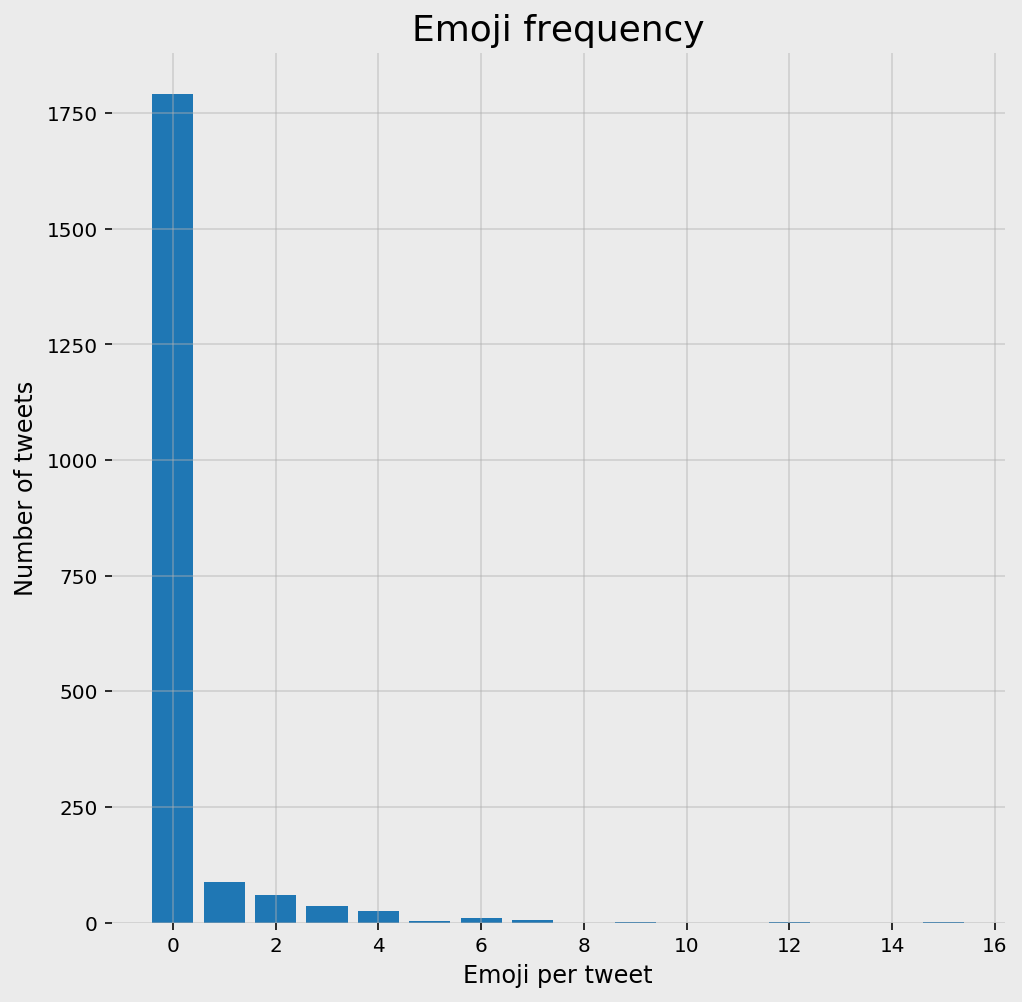

In [26]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [27]:
emoji_summary['top_emoji'][:20]

[('😂', 223),
 ('😭', 21),
 ('🤔', 19),
 ('😁', 17),
 ('☎', 16),
 ('👇', 15),
 ('🤣', 9),
 ('📞', 9),
 ('😒', 8),
 ('😀', 8),
 ('😢', 8),
 ('😏', 8),
 ('😎', 7),
 ('😥', 7),
 ('😕', 7),
 ('😃', 6),
 ('😅', 6),
 ('😔', 6),
 ('😖', 6),
 ('📲', 6)]

In [28]:
emoji_summary['top_emoji_text'][:20]

[('face with tears of joy', 223),
 ('loudly crying face', 21),
 ('thinking face', 19),
 ('beaming face with smiling eyes', 17),
 ('telephone', 16),
 ('backhand index pointing down', 15),
 ('rolling on the floor laughing', 9),
 ('telephone receiver', 9),
 ('unamused face', 8),
 ('grinning face', 8),
 ('crying face', 8),
 ('smirking face', 8),
 ('smiling face with sunglasses', 7),
 ('sad but relieved face', 7),
 ('confused face', 7),
 ('grinning face with big eyes', 6),
 ('grinning face with sweat', 6),
 ('pensive face', 6),
 ('confounded face', 6),
 ('mobile phone with arrow', 6)]

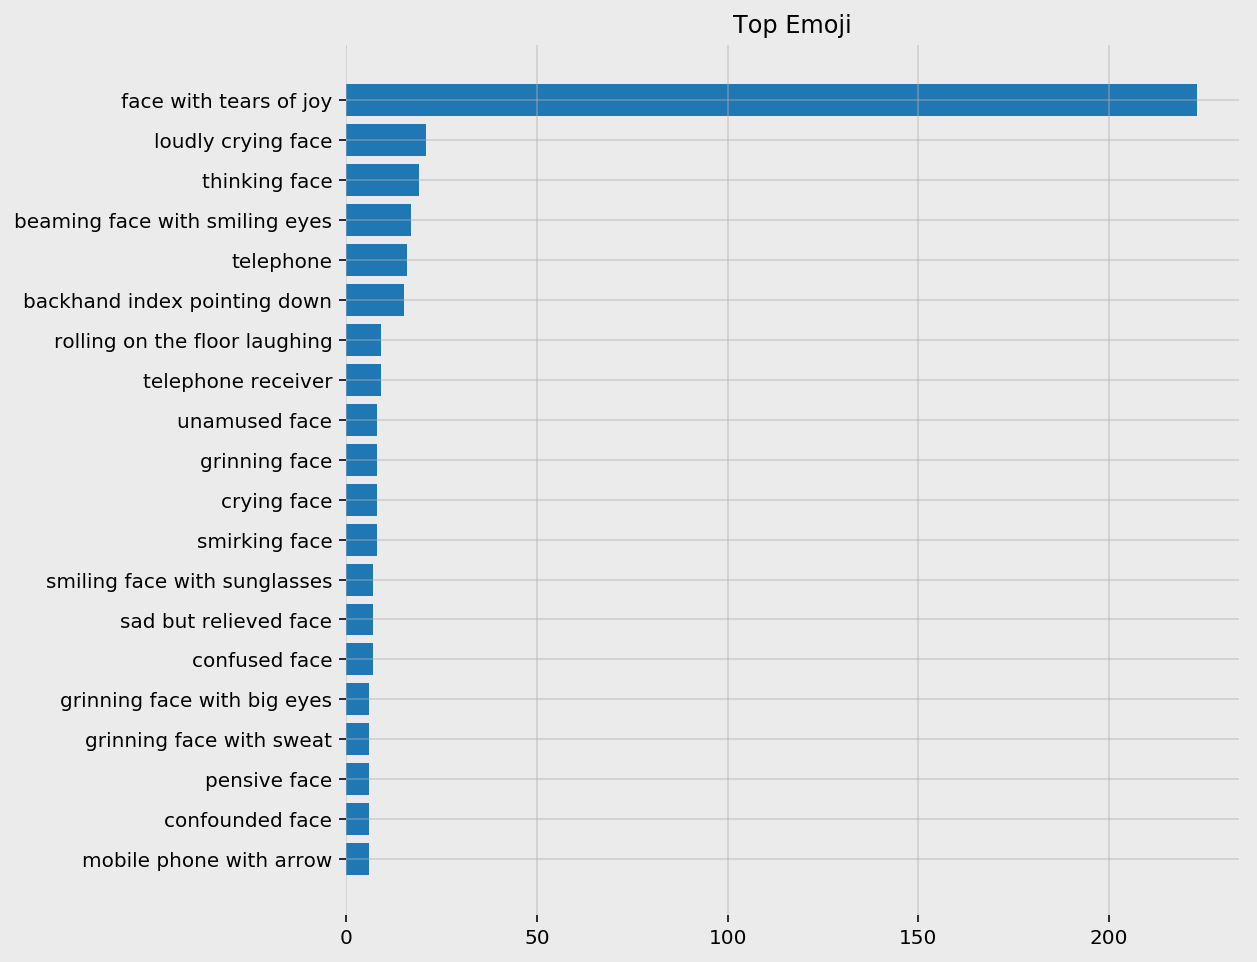

In [29]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

## Mentions Summary

In [30]:
mention_summary = adv.extract_mentions(helb_df['tweet_full_text'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [31]:
mention_summary['overview']

{'num_posts': 2024,
 'num_mentions': 1099,
 'mentions_per_post': 0.5429841897233202,
 'unique_mentions': 365}

#### Mentions Per Tweet

In [32]:
# Mentions per Tweet
mention_summary['mentions'][:15]

[['@amb_a_mohammed', '@yvonneokwara'],
 ['@ntvkenya', '@realmuinde', '@sakajajohnson', '@senmutula', '@ukenyatta'],
 ['@bensonnesh1', '@herbertmpoke'],
 [],
 ['@ntvkenya', '@sakajajohnson', '@senmutula', '@sakajajohnson'],
 [],
 ['@karanjakibicho',
  '@interiorke',
  '@fredmatiangi',
  '@olentutuk',
  '@wanguimuchiri',
  '@citizentvkenya',
  '@hudumanambake'],
 [],
 ['@babu_owino', '@amb_a_mohammed', '@helbpage'],
 [],
 ['@helbpage'],
 ['@dumoro', '@muthuimkenya', '@wanjikurevolt'],
 [],
 ['@amb_a_mohammed'],
 []]

#### List of all Mentions

In [33]:
# Get a list of all mentions -- Flattening the Mentions
mention_summary['mentions_flat'][:10]

['@amb_a_mohammed',
 '@yvonneokwara',
 '@ntvkenya',
 '@realmuinde',
 '@sakajajohnson',
 '@senmutula',
 '@ukenyatta',
 '@bensonnesh1',
 '@herbertmpoke',
 '@ntvkenya']

#### Mention Counts per Tweet

In [34]:
mention_summary['mention_counts'][:20]

[2, 5, 2, 0, 4, 0, 7, 0, 3, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1]

In [35]:
# Frequency of Mentions
mention_summary['mention_freq'][:15]

[(0, 1496),
 (1, 304),
 (2, 101),
 (3, 42),
 (4, 30),
 (5, 21),
 (6, 12),
 (7, 6),
 (9, 4),
 (10, 2),
 (11, 1),
 (12, 4),
 (13, 1)]

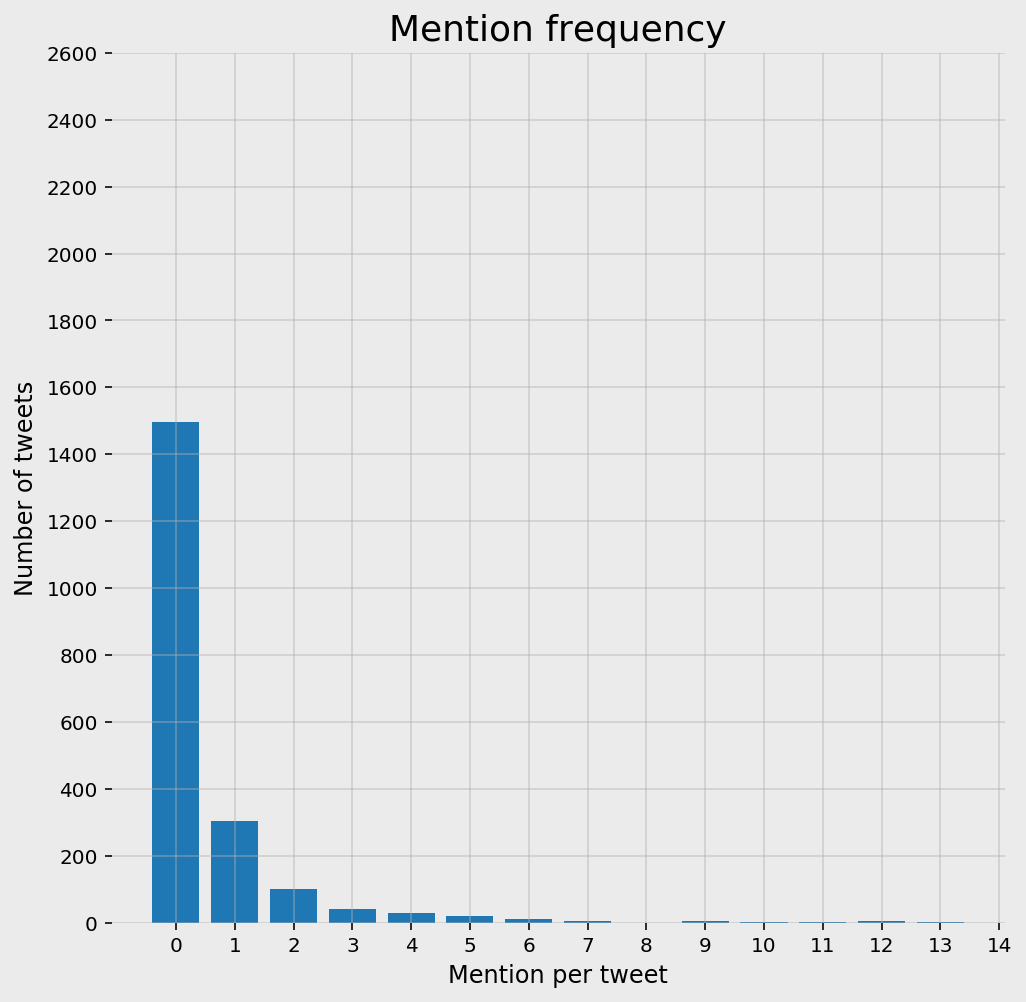

In [36]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [37]:
# Top mentions
mention_summary['top_mentions'][:10]

[('@amb_a_mohammed', 164),
 ('@helbpage', 112),
 ('@ukenyatta', 51),
 ('@citizentvkenya', 25),
 ('@babu_owino', 20),
 ('@williamsruto', 16),
 ('@npsofficial_ke', 14),
 ('@nationbreaking', 14),
 ('@nrgradioke', 14),
 ('@aminajmohammed', 12)]

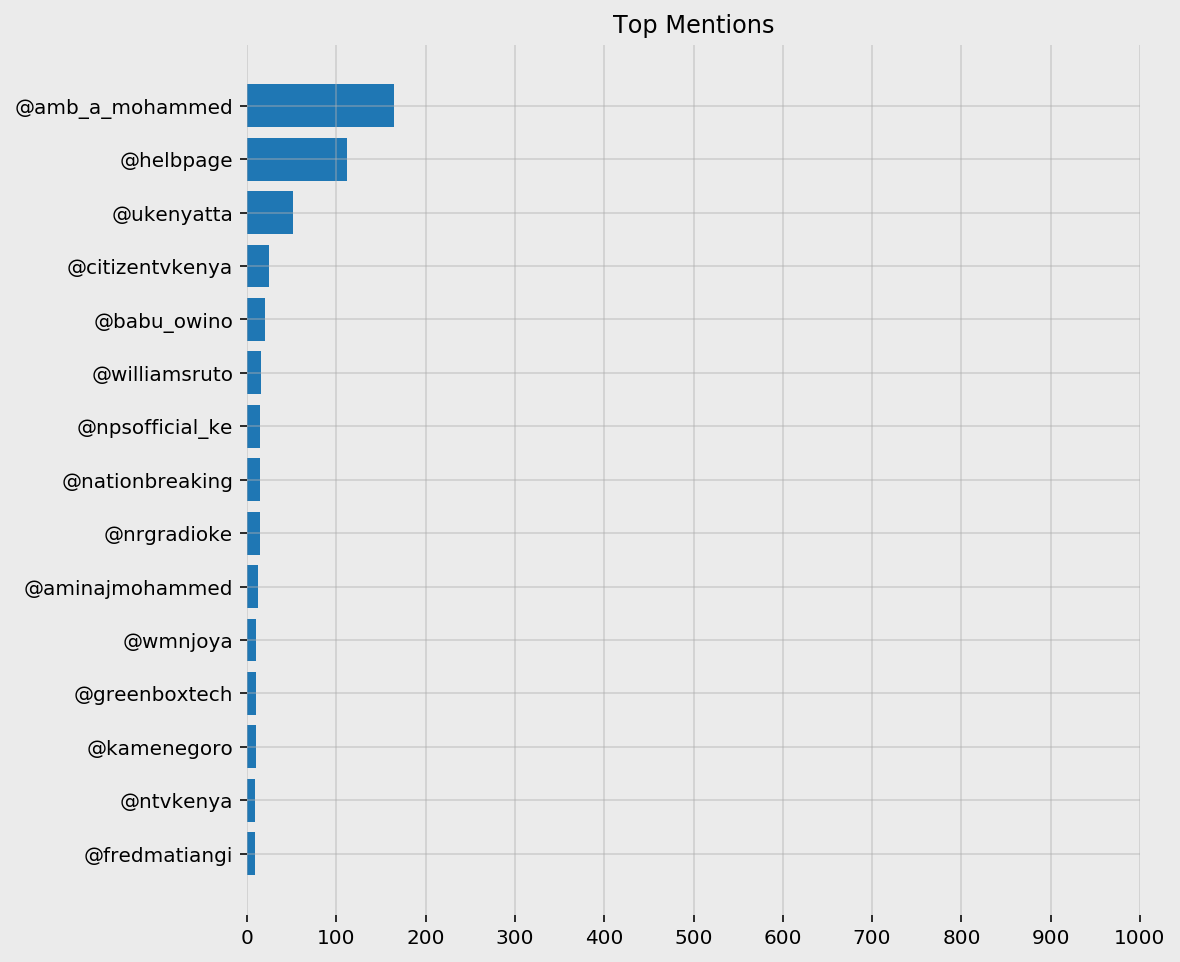

In [38]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

In [40]:
extracted_tweets =  (helb_df[['tweet_full_text', 'user_screen_name', 'user_followers_count']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_tweets.head()

,tweet_full_text,user_screen_name,user_followers_count,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,"CS @AMB_A_Mohammed was categorical about the defaulters of #HELB. She mentioned defaulters ""who hold jobs"". Not jobless people. A jobless person can not be a defaulter. It is common sense. Pay the loan if you have a job. #Newsgang @YvonneOkwara",Alibash_Mohamed,3446.0,"[#helb, #newsgang]",2,"[@amb_a_mohammed, @yvonneokwara]",2,[],[],0
1,@ntvkenya @RealMuinde @SakajaJohnson We as the young people of this country we are told to bootstrap ourselves out of this #HELB situation when millions of young people don't even have boots.\r\nDegrees gathering dusts in the boxes under beds.\r\n@SenMutula \r\n@UKenyatta,Seth_Oduor,3676.0,[#helb],1,"[@ntvkenya, @realmuinde, @sakajajohnson, @senmutula, @ukenyatta]",5,[],[],0
2,"While #HELB plans on arresting loan defaulters, the ministry is scrapping of the same #courses the defaulters studied. You can't pick-pocket a naked man, Or can you? @bensonnesh1 @herbertmpoke Not mentioning unemployment rates.",EphraimGikwa,205.0,"[#helb, #courses]",2,"[@bensonnesh1, @herbertmpoke]",2,[],[],0
3,#HELB most of the graduates lack the jobs to pay that loan itself... Provide opportunity to repay that money you insisting on and it will all be flashed in your big pockets😠😠😠😠 https://t.co/sTIJd5uyzb,WacukaBree,9.0,[#helb],1,[],0,"[😠, 😠, 😠, 😠]","[angry face, angry face, angry face, angry face]",4
4,"@ntvkenya @SakajaJohnson So now the govt feels it really needs to recover #HELB of Kes 7.2b used to educate(Govt obligation) more that 76,000 jobless graduates. While it is ok to let go of NHIF looting, NYS 1and 2, irrigation, Maize scandals and many scandals. @SenMutula @Sak...",barongoharonbar,146.0,[#helb],1,"[@ntvkenya, @sakajajohnson, @senmutula, @sakajajohnson]",4,[],[],0


### Absolute and Weighted Counts

In [41]:
word_freq_hash = adv.word_frequency(extracted_tweets['hashtags'].str.join(' '), 
                                    extracted_tweets['user_followers_count'].fillna(0))
word_freq_hash.head(10)

,word,abs_freq,wtd_freq,rel_value
0,#helb,2066,12454759.0,6028.0
1,#thursdaythoughts,413,505416.0,1224.0
2,#alexnajalas,29,472614.0,16297.0
3,#bandahomesscam,361,472063.0,1308.0
4,#jubileeisfraud,2,426331.0,213166.0
5,#chambuacounties2019,2,426264.0,213132.0
6,#thursdaymotivation,99,209442.0,2116.0
7,#sankalpafrica19,273,200333.0,734.0
8,#kpcagainstcorruption,68,182439.0,2683.0
9,#appreciatingourheroes,38,150228.0,3953.0


In [43]:
extracted_tweets[extracted_tweets['hashtags'].str.join(' ').str.contains('bandahomesscam|itstrue',case=False)]

,tweet_full_text,user_screen_name,user_followers_count,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
37,Malcolm x was shot dead on this day in 1965.\r\n#KPCAgainstCorruption \r\n#BandaHomesScam \r\n#HELB \r\n#offplannitrue \r\n#CHEMUN \r\n#JussieSmollett https://t.co/u6Id6XdKeY,wainainahsteve,4601.0,"[#kpcagainstcorruption, #bandahomesscam, #helb, #offplannitrue, #chemun, #jussiesmollett]",6,[],0,[],[],0
64,#KenyaCup #HELB Nairobi #BandaHomesScam #thursdaythoughts \r\n\r\nInquiries: 0775 499 040\r\nMail: s.itre333@gmail.com https://t.co/GFNgFMwmBl,BossTips4,5.0,"[#kenyacup, #helb, #bandahomesscam, #thursdaythoughts]",4,[],0,[],[],0
109,You get #HELB\r\nNo jobs after school \r\nCan't repay for loan's \r\nCAN'T RUN FOR ANY POLITICAL SEAT WHILE BANKRUPT\r\nTheir children or themselves run the government \r\nWe forever live to complain about poor leadership \r\n#ResistHudumaNamba \r\n#ThursdayThoughts \r\n#Off...,wagurah254,563.0,"[#helb, #resisthudumanamba, #thursdaythoughts, #offplannitrue, #bandahomesscam]",5,[],0,[],[],0
148,"DEAL: WE GIVE YOU A TOTAL ODD BETWEEN 3 &amp; 4, YOU PLACE 1000+AND PAY US KSHS 500 AFTER WIN. IF YOU ARE OKAY WITH THE DEALRETWEET,FOLLOW AND WHATSAPP 0706303973 FOR DEAL\r\n\r\n#HELB #BandaDelivers #BandaHomesScam #AppreciatingOurHeroes Baringo South https://t.co/3Vcv901Kv3",bets_kenya,12437.0,"[#helb, #bandadelivers, #bandahomesscam, #appreciatingourheroes]",4,[],0,[],[],0
170,#BandaHomesScam #HELB show love with some zanzi love.... For wholesale prices DM https://t.co/olSjYpl8vl,emezish,761.0,"[#bandahomesscam, #helb]",2,[],0,[],[],0
179,Diversify Your Investments\r\n#HELB\r\n#BandaHomesScam\r\n#ThursdayThoughts\r\n#AppreciatingOurHeroes\r\n#KPCAgainstCorruption\r\n#SankalpAfrica19\r\nBaringo County\r\n#BaringoBleeding https://t.co/MlIXGhDep5,DurianConsult,225.0,"[#helb, #bandahomesscam, #thursdaythoughts, #appreciatingourheroes, #kpcagainstcorruption, #sankalpafrica19, #baringobleeding]",7,[],0,[],[],0
214,"Ghost busters…. HELB to hunt down loan Defaulters. CS Amina 😎😎\r\n\r\n#HELB #BandaHomesScam\r\n#BandaDelivers Nairobi, Kenyans https://t.co/zNm0sYkCpJ",theflipke,1401.0,"[#helb, #bandahomesscam, #bandadelivers]",3,[],0,"[😎, 😎]","[smiling face with sunglasses, smiling face with sunglasses]",2
222,#ThursdayThoughts\r\n\r\n#BandaDelivers Vs #BandaHomesScam \r\nWhich is which? Keyboard gangsters and online goons at work. \r\n#HELB\r\n#HOT96Drive,DerrickMuhika,5.0,"[#thursdaythoughts, #bandadelivers, #bandahomesscam, #helb, #hot96drive]",5,[],0,[],[],0
230,Samsung 65” Digital Smart UHD 4K Curved Tv @ksh.131999\r\nContact Support:0711516475\r\nFeatures:\r\n65″Curved LED\r\n4K Ultra HD\r\nSmart LED\r\nDVB-T2\r\n3 HDMI Input\r\n2 USB Input\r\nQuad Core Processor\r\n#BandaHomesScam #OffPlanNiTrue #HELB #ASBCconferenceKE https://t.c...,CellularKenya,1721.0,"[#bandahomesscam, #offplannitrue, #helb, #asbcconferenceke]",4,[@ksh],1,[],[],0
262,FLASH SALE \r\nLEADDER bluetooth Multimedia Speaker sp-312\r\n➡️stereo surround\r\n➡️2.1 channel stereo music\r\n➡️Don't miss these great offers\r\n👉Shop here.&gt;&gt; https://t.co/r6SpvJEpIX #HELB #BandaHomesScam #ThursdayThoughts https://t.co/le0NYePSNm,kenya_amanbo,472.0,"[#helb, #bandahomesscam, #thursdaythoughts]",3,[],0,"[➡, ➡, ➡, 👉]","[right arrow, right arrow, right arrow, backhand index pointing right]",4
